# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd 
import numpy as np
import re
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [13]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv",mode="wb") as file:
    file.write(response.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
consumer_key = '1M6ldtU7AsyIExNtW8RnjKkhl'
consumer_secret = 'HObhH1T2pjgQcIKKZnLKHw8sGMG81WNRB40OQPPdf9HmRBC4Ie'
access_token = '775724480672903169-VQDEQpw3j5qaA2lfe52CKRX6QpOpiNQ'
access_secret = 'RVXlGkB96PS5yzaP33NI8ABHMi3GV0vIBwsm8YK5Qd1Hg'


# Authenticate with the Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = 'xxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxx'
access_token = 'xxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxx'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 693


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Rate limit reached. Sleeping for: 695


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

In [6]:
## Create an empty list to store the tweet data
df_list=[]
# Open the tweet_json.txt file and read the JSON objects
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))


In [7]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
#Convert the list to a dataframe
tweet_data = pd.DataFrame(df_list, columns=['id', 'retweet_count','favorite_count'])
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6875,32869
1,892177421306343426,5177,28399
2,891815181378084864,3421,21345
3,891689557279858688,7084,35844
4,891327558926688256,7592,34289


In [9]:
#rename 'id' column into 'tweet_id'.
tweet_data.rename(columns = {'id':'tweet_id'}, inplace = True)
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6875,32869
1,892177421306343426,5177,28399
2,891815181378084864,3421,21345
3,891689557279858688,7084,35844
4,891327558926688256,7592,34289


In [10]:
#convert dataframe to csv file.
tweet_data.to_csv("tweet_data.csv", index = False)

In [11]:
x= pd.read_csv('tweet_data.csv')
x.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6875,32869
1,892177421306343426,5177,28399
2,891815181378084864,3421,21345
3,891689557279858688,7084,35844
4,891327558926688256,7592,34289


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### A. Assessing the Tweet archrive data

In [14]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [18]:
#counts the number of non-NA/null values in dataframe which include rows with rating_numerator values less than 10.
df_1[df_1.rating_numerator<10].count()[0]

440

In [19]:
df_1[df_1.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [20]:
df_1.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [21]:
df_1[df_1.rating_denominator==10].tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2333, dtype: int64

In [22]:
#checking the rating_denominator with 0 
df_1[df_1.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [23]:
# checking the rating_denominator value not equal to 10
df_1[df_1.rating_denominator!= 10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [24]:
df_1[df_1.rating_denominator!= 10].count()[0]

23

In [25]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### B. Asscessing the tweet image prediction

In [26]:
df_image = pd.read_csv('image-predictions.tsv',sep= '\t')

In [27]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
694,684241637099323392,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,1,Pembroke,0.508498,True,black-footed_ferret,0.115532,False,weasel,0.051280,False
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
1734,821522889702862852,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1,Doberman,0.763539,True,black-and-tan_coonhound,0.136602,True,miniature_pinscher,0.087654,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True


In [28]:
df_image.loc[1300, 'jpg_url']

'https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg'

In [29]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg')

In [30]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### C. Ascessing Tweet data From API

In [31]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6875,32869
1,892177421306343426,5177,28399
2,891815181378084864,3421,21345
3,891689557279858688,7084,35844
4,891327558926688256,7592,34289


In [32]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
1974,672272411274932228,2883,5605
1498,690348396616552449,457,1340
377,825120256414846976,1154,0
1104,728653952833728512,930,2993
2211,667911425562669056,239,421
1556,686760001961103360,1241,3175
114,869702957897576449,5299,24303
2071,670679630144274432,235,648
1784,676613908052996102,170,960
697,783391753726550016,5010,15593


In [33]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


### Quality issues

#### Twitter archives table

1.Tweet_id is a integer not a string.

2.Datestamp is string not datetime.

3.Inaccurate dog names in the name column.

4.Inaccurate values in the rating_numerator and rating_denominator columns.

5.The majority of the entries in the retweeted_status_id, retweeted_status_user id, in_reply_to_status_id, and 
retweeted_tatus_timstamp columns are null.

6.row no. 313 has denomenator 0.

7.23 row has a denomentaor value not equal to 10.

8. In dog name column 745 rows has name "None" instated of 'NaN'. 

#### Image predictions table
1. Incorrect data type for tweet id.
2. The values in the columns p1_conf, p2_conf and p3_conf should be percentages instead of proportions.
3. Inconsistent letter cases in the columns p1, p2 and p3.

### Tidiness issues


#### Twitter archives table
1.Doggo, floofer, pupper, puppo should be column values but are instead column headers.

2.Two values in the timestamp column: date and time.

3.Adding the favourite count column to this table from the tweet_data table.


#### Image predictions table
1.Joining this table and the twitter archives table.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [244]:
# Make copies of original pieces of data
tw_arch_clean = df_1.copy()
image_pred_clean = df_image.copy()
tw_data_clean = tweet_data.copy()

In [245]:
tw_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1: 

#### Define: 

Remove all the retweets by removing all the rows with non null values in retweeted_status_id.

#### Code

In [246]:
tw_arch_clean = tw_arch_clean[tw_arch_clean.retweeted_status_id.isnull()]

#### Test

In [247]:
tw_arch_clean[tw_arch_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [248]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:

#### Define 

Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.¶

#### Code

In [249]:
tw_arch_clean = tw_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [250]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3:

#### Define 

 * change the data type of 'tweet_id' column from integer to string and 'timestamp'column from  string into datetime.
 * Change the datatype of the rating_numerator and rating_denominator columns to float.


#### Code

In [251]:
tw_arch_clean['tweet_id'] = tw_arch_clean['tweet_id'].astype(str)

In [252]:
tw_arch_clean['timestamp'] = pd.to_datetime(tw_arch_clean['timestamp'],yearfirst = True)

In [253]:
tw_arch_clean.rating_numerator = tw_arch_clean.rating_numerator.astype(float)
tw_arch_clean.rating_denominator = tw_arch_clean.rating_denominator.astype(float)

#### Test

In [254]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [255]:
tw_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


### Issue #4:

#### Define 

* Merge the 4 column doggo, floofer, pupper, puppo into one column dog_type. 

#### Code

In [256]:
#creating the column dog_type
tw_arch_clean['dog_type'] = tw_arch_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)


In [257]:
#removing  whitespaces which got extracted to the dog_type column.
tw_arch_clean.dog_type = tw_arch_clean.dog_type.str.strip()

In [258]:
# drop unrequired column
try:
    tw_arch_clean = tw_arch_clean.drop(columns=['doggo','floofer', 'pupper','puppo'])
except KeyError as e:
    pass


In [259]:
#changing the datatype of dog_type to category
tw_arch_clean.dog_type = tw_arch_clean.dog_type.astype('category')

#### Test

In [260]:
tw_arch_clean.dog_type.value_counts()

pupper     152
doggo       55
puppo       30
floofer      3
Name: dog_type, dtype: int64

In [261]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                2175 non-null   object             
 8   dog_type            240 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 155.3+ KB


### Issue #5:

#### Define 

Merge all dataframe into one based on tweet_id 

#### Code

In [262]:
# first make data types of 'tweet_id' column in all table same datatypes.
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)
tw_data_clean['tweet_id'] = tw_data_clean ['tweet_id'].astype(str)

In [263]:
merged_df = pd.merge(tw_arch_clean, image_pred_clean, on='tweet_id')
merged_df = pd.merge(merged_df, tw_data_clean, on='tweet_id')

In [264]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   float64            
 6   rating_denominator  1986 non-null   float64            
 7   name                1986 non-null   object             
 8   dog_type            214 non-null    category           
 9   jpg_url             1986 non-null   object             
 10  img_num             1986 non-null   int64              
 11  p1                  1986 non-null   object             
 12  p1_conf             1986 non-null 

In [265]:
#dropping the unnecessary columns
merged_df = merged_df.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [266]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   float64            
 6   rating_denominator  1986 non-null   float64            
 7   name                1986 non-null   object             
 8   dog_type            214 non-null    category           
 9   jpg_url             1986 non-null   object             
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

In [267]:
merged_df.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
1981,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,35,85
1982,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,113,243
1983,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,35,98
1984,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,39,111
1985,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,416,2230


### Issue #6:

#### Define 

extract the date and time from the timestamp column and put them into two new columns.

#### Code

In [268]:
#Extract the date from the timestamp column and put it into a new column called 'date':
merged_df['date'] =merged_df['timestamp'].dt.date
#Extract the time from the timestamp column and put it into a new column called 'time':
merged_df['time'] = merged_df['timestamp'].dt.time
#Drop the timestamp column:
merged_df = merged_df.drop(columns=['timestamp'])

#### Test

In [269]:
merged_df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,6875,32869,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,5177,28399,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,3421,21345,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,7084,35844,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,7592,34289,2017-07-29,16:00:24


### Issue #7:

#### Define 

make the source column more readable by replace the URLs with the source name

In [270]:
merged_df.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,date,time
1097,699370870310113280,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,https://twitter.com/dog_rates/status/699370870...,11.0,10.0,Calbert,NaN,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,cairn,0.337557,True,383,1696,2016-02-15,23:13:03
737,747963614829678593,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,https://twitter.com/dog_rates/status/747963614...,10.0,10.0,None,pupper,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,kelpie,0.307672,True,1920,5240,2016-06-29,01:23:16
1131,696877980375769088,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,https://twitter.com/dog_rates/status/696877980...,9.0,10.0,Misty,pupper,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,space_heater,0.206876,False,627,2204,2016-02-09,02:07:12
236,834458053273591808,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,https://twitter.com/dog_rates/status/834458053...,12.0,10.0,Chester,NaN,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,Rhodesian_ridgeback,0.468619,True,1519,8791,2017-02-22,17:41:18
1478,676101918813499392,"<a href=""http://twitter.com/download/iphone"" r...",Meet Striker. He's ready for Christmas. 11/10 ...,https://twitter.com/dog_rates/status/676101918...,11.0,10.0,Striker,NaN,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,Shih-Tzu,0.225848,True,1032,2531,2015-12-13,18:10:33


#### Code

In [271]:
#the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
#using the variables created above in the replace function 
merged_df.source = merged_df.source.replace(a, 'Twitter for iPhone')
merged_df.source = merged_df.source.replace(b, 'Twitter Web Client')
merged_df.source = merged_df.source.replace(c, 'TweetDeck')

#### Test

In [272]:
merged_df.source.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Issue #8:

#### Define 

* Replace all incorrect dog names that are in lowercase with the correct names by extracting them from the corresponding text. Also, replace any remaining 'None' values in the name column with NaN values.

#### Code

In [273]:
# replace the name 'None' with NaN
merged_df['name'].replace('None', np.nan, inplace=True)
#replace all the names that contain only lowercase letters and not null with NaN in the name column 
merged_df.loc[~pd.isnull(merged_df['name']) & merged_df['name'].str.islower(), 'name'] = np.nan
sum(merged_df.name.isnull())

643

In [274]:
# Define a function which search for a regular expression pattern, which is 'named' followed by 
#one or more whitespaces, followed by one or more uppercase letters, followed by one or more lowercase letters.
def function(text):
    match = re.search(r'named\s([A-Z][a-z]+)', text)
    if match:
        return match.group(1)
    return np.nan

In [275]:
# replacing the null values in the 'name' column of the 'merged_df' dataframe with the values 
#returned by the 'function' when applied on the 'text' column of the same dataframe.
merged_df.name = np.where(merged_df.name.isnull(), merged_df.text.apply(function),merged_df.name)

#### Test

In [276]:
sum(merged_df.name.isnull())
# name is added in the place of some null value.

620

### Issue #9:

#### Define 

Replace the underscores in the p1 columns by spaces.

#### Code

In [277]:
#replacing using the replace function
merged_df.p1 = merged_df.p1.str.replace('_',' ')


#### Test

In [278]:
merged_df.p1

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper towel
4                       basset
                 ...          
1981        miniature pinscher
1982       Rhodesian ridgeback
1983           German shepherd
1984                   redbone
1985    Welsh springer spaniel
Name: p1, Length: 1986, dtype: object

### Issue #10:

#### Define 

* Convert the proportions in the p1_conf columns into percentages.
* Changing the name of the column jpg_url' to 'image_url', 'p1' to 'prediction_1','p1_conf' to 'confidence_percent_1', and 'p1_dog' to 'breed_predicted_1.
* Rearrange the column for batter viewing. 

#### Code

In [281]:

merged_df.p1_conf = merged_df.p1_conf.apply(lambda x: round(x*100, 2))

In [290]:
#re-arranging all the columns for better viewing
merged_df = merged_df[['tweet_id', 'source', 'image_url', 'date', 'time', 'favorite_count',
                                                 'retweet_count', 'text', 'name', 'dog_type', 'rating_numerator',
                                                 'rating_denominator', 'prediction_1', 'confidence_percent_1', 
                                                 'breed_predicted_1', 'expanded_urls']]

In [291]:

merged_df = merged_df.rename({'jpg_url': 'image_url', 'p1': 'prediction_1',
                             'p1_conf': 'confidence_percent_1', 'p1_dog': 'breed_predicted_1',
                                                          },
                                                         axis = 'columns')

#### Test

In [292]:
merged_df.head(5)

,tweet_id,source,image_url,date,time,favorite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction_1,confidence_percent_1,breed_predicted_1,expanded_urls
0,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,32869,6875,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,10.0,orange,10.0,False,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,28399,5177,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,10.0,Chihuahua,32.0,True,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,21345,3421,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,10.0,Chihuahua,72.0,True,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30,15:58:51,35844,7084,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0,10.0,paper towel,17.0,False,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29,16:00:24,34289,7592,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0,10.0,basset,56.0,True,https://twitter.com/dog_rates/status/891327558...


In [293]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tweet_id              1986 non-null   object  
 1   source                1986 non-null   object  
 2   image_url             1986 non-null   object  
 3   date                  1986 non-null   object  
 4   time                  1986 non-null   object  
 5   favorite_count        1986 non-null   int64   
 6   retweet_count         1986 non-null   int64   
 7   text                  1986 non-null   object  
 8   name                  1366 non-null   object  
 9   dog_type              214 non-null    category
 10  rating_numerator      1986 non-null   float64 
 11  rating_denominator    1986 non-null   float64 
 12  prediction_1          1986 non-null   object  
 13  confidence_percent_1  1986 non-null   float64 
 14  breed_predicted_1     1986 non-null   bool    
 15  expa

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [294]:
merged_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [297]:
twitter_data = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')
twitter_data.head()

,tweet_id,source,image_url,date,time,favorite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction_1,confidence_percent_1,breed_predicted_1,expanded_urls
0,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,32869,6875,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,10.0,orange,10.0,False,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,28399,5177,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,10.0,Chihuahua,32.0,True,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,21345,3421,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,10.0,Chihuahua,72.0,True,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30,15:58:51,35844,7084,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0,10.0,paper towel,17.0,False,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29,16:00:24,34289,7592,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0,10.0,basset,56.0,True,https://twitter.com/dog_rates/status/891327558...


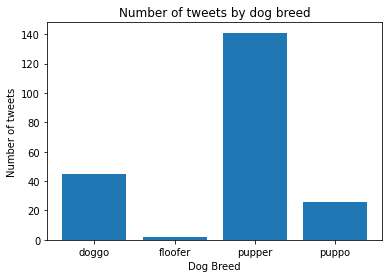

In [302]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by dog_type and count the number of tweets for each breed
breed_counts = twitter_data.groupby('dog_type').size().reset_index(name='counts')

# Plot the data
plt.bar(breed_counts['dog_type'], breed_counts['counts'])
plt.xlabel('Dog Breed')
plt.ylabel('Number of tweets')
plt.title('Number of tweets by dog breed')
plt.show()


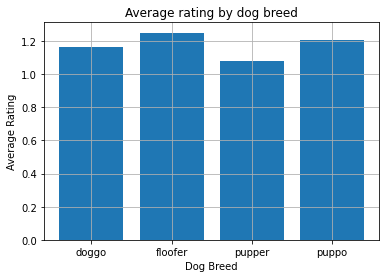

In [306]:
# Create a new column 'rating' that calculates the rating as rating_numerator/rating_denominator
twitter_data['rating'] = twitter_data['rating_numerator']/twitter_data['rating_denominator']

# Group the data by dog_type and calculate the mean rating for each breed
breed_ratings = twitter_data.groupby('dog_type')['rating'].mean().reset_index()

# Plot the data
plt.bar(breed_ratings['dog_type'], breed_ratings['rating'])
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Average rating by dog breed')
plt.grid()
plt.show()

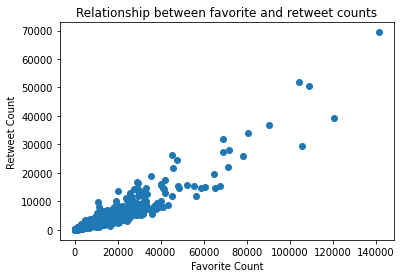

In [314]:

from scipy.stats import linregress
# Create a scatter plot of the favorite_count and retweet_count columns
plt.scatter(twitter_data['favorite_count'], twitter_data['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship between favorite and retweet counts')
plt.show()

### Insights:
1. pupper is the are most commonly tweeted breeds and floofer  are less common.

2.Floofer are the highly rated breed among other breed

3. There is a linear relationship between favorite and retweet count. 

### Visualization